In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('salexpdata.csv')

data.head()

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4


In [3]:
X_label, Y_label = data.columns[1], data.columns[0]

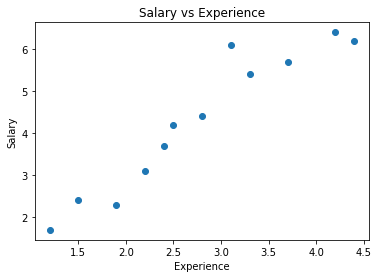

In [4]:
plt.scatter(data[X_label], data[Y_label])
plt.xlabel(X_label.capitalize())
plt.ylabel(Y_label.capitalize())
plt.title('Salary vs Experience')
plt.show()

In [5]:
X = data[X_label].values.reshape(-1, 1)
Y = data[Y_label].values.reshape(-1, 1)

In [6]:
slr_model = LinearRegression()
slr_model.fit(X, Y)

LinearRegression()

In [7]:
print(f'Linear Regression Line: {slr_model.intercept_[0]} + {slr_model.coef_[0][0]} * X')

Linear Regression Line: -0.035638610947616556 + 1.567098293113596 * X


In [8]:
X_test = np.linspace(X.min()-0.5, X.max()+0.5, 100).reshape(-1, 1)
Y_test = slr_model.predict(X_test)

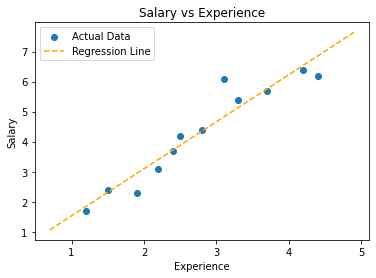

In [9]:
plt.scatter(X, Y, label='Actual Data')
plt.plot(X_test, Y_test, '--', color='orange', label='Regression Line')
plt.xlabel(X_label.capitalize())
plt.ylabel(Y_label.capitalize())
plt.title('Salary vs Experience')
plt.legend()
plt.show()

In [10]:
def get_predictions(X, w, b):
    return w * X + b

def mean_squared_errors(Y_actual, Y_pred):
    return np.sum((Y_actual - Y_pred) ** 2) / len(Y_actual)

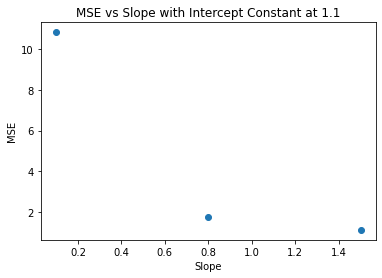

In [11]:
intercept = 1.1

slopes = [0.1, 1.5, 0.8]
mses = []

for slope in slopes:
    Y_pred = get_predictions(X, slope, intercept)
    mses.append(mean_squared_errors(Y, Y_pred))

plt.scatter(slopes, mses)
plt.xlabel('Slope')
plt.ylabel('MSE')
plt.title('MSE vs Slope with Intercept Constant at 1.1')
plt.show()

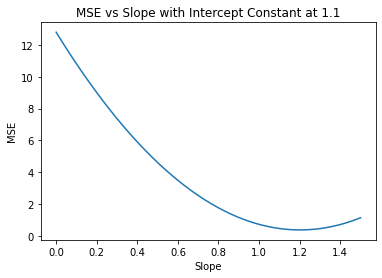

In [12]:
intercept = 1.1

slopes = np.linspace(0, 1.5, 100)
mses = []

for slope in slopes:
    Y_pred = get_predictions(X, slope, intercept)
    mses.append(mean_squared_errors(Y, Y_pred))
    
mses = np.array(mses)

plt.plot(slopes, mses)
plt.xlabel('Slope')
plt.ylabel('MSE')
plt.title('MSE vs Slope with Intercept Constant at 1.1')
plt.show()

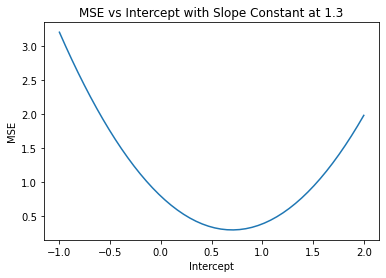

In [13]:
intercepts = np.linspace(-1, 2)

slope = 1.3
mses = []

for intercept in intercepts:
    Y_pred = get_predictions(X, slope, intercept)
    mses.append(mean_squared_errors(Y, Y_pred))
    
mses = np.array(mses)

plt.plot(intercepts, mses)
plt.xlabel('Intercept')
plt.ylabel('MSE')
plt.title('MSE vs Intercept with Slope Constant at 1.3')
plt.show()

In [14]:
Y_ = slr_model.predict(X)

print(f'Mean Squared Error (SkLearn Function): {mean_squared_error(Y, Y_)}')
print(f'Mean Squared Error (My Function): {mean_squared_errors(Y, Y_)}')

Mean Squared Error (SkLearn Function): 0.23366710810280558
Mean Squared Error (My Function): 0.23366710810280558
